## BMI 6106 - Final Project

#### Project by: <br>
Jorge Rojas <br>
Gabby Iorg <br>
Anwar Alsanea <br>

# Statistical analysis on NEMSIS 

### Abstract <br>


### Introduction <br>


### Methods 

### Results and Discussion

In [ ]:
install.packages(c("FactoMineR", "factoextra"))
install.packages("corrplot")

In [ ]:
dfgdf

In [77]:
install.packages("PCAmixdata")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [75]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library("FactoMineR")
library("corrplot")
library("factoextra")
library(modelr)
library(broom)

require(stats)
#require(pls)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

corrplot 0.84 loaded
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: ‘broom’

The following object is masked from ‘package:modelr’:

    bootstrap



In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [78]:
library("PCAmixdata")

In [124]:
events = read.table(file = "events_cleaned_v3.txt", sep="|", header = TRUE, stringsAsFactors = F)
#head(events, n=50)
dim(events)

[1] 10000    44

In [125]:
dim(event1)

[1] 10000     8

In [100]:
event1 = select(events,  age.in.years,  gender, primary.method.of.payment, 
                incident.location.type, primary.symptom, 
                cause.of.injury, incident.patient.disposition, complaint.reported.by.dispatch
                )


event1[event1 < 0] <- NA
#head(event1, n=50)
event2 = na.exclude(event1)
dim(event2)
head(event2)


[1] 292   8

,age.in.years,gender,primary.method.of.payment,incident.location.type,primary.symptom,cause.of.injury,incident.patient.disposition,complaint.reported.by.dispatch
43,19,650,720,1175,1415,9600,4850,560
46,75,650,720,1175,1495,9550,4850,560
50,79,655,730,1135,1405,9550,4850,545
63,54,655,745,1135,1405,9640,4840,415
67,45,655,735,1135,1475,9550,4850,525
79,50,650,735,1135,1475,9550,4850,525


In [101]:
#Converting gender as factor:
event2$gender <-as.factor(event2$gender)
levels(event2$gender) <- c("male", "female")

#Converting dataframe as factor:
event2 <- data.frame(lapply(event2, as.factor))

#Converting age.in.years as numeric:
event2$age.in.years <-as.numeric(event2$age.in.years)
#event2$day.of.year <-as.numeric(event2$day.of.year)

#Checking summaries
summary(event2)
contrasts(event2$gender)

head(event2)


  age.in.years      gender    primary.method.of.payment incident.location.type
 Min.   : 1.00   male  :134   720:112                   1160   :139           
 1st Qu.:23.00   female:158   725: 52                   1135   :106           
 Median :45.00                730: 67                   1175   : 22           
 Mean   :43.96                735: 18                   1180   : 10           
 3rd Qu.:62.25                745: 39                   1170   :  7           
 Max.   :85.00                750:  4                   1150   :  4           
                                                        (Other):  4           
 primary.symptom cause.of.injury incident.patient.disposition
 1475   :177     9550   :144     4835: 14                    
 1405   : 39     9595   : 85     4840:  2                    
 1500   : 19     9640   : 18     4845:  2                    
 1415   : 17     9590   :  7     4850:274                    
 1505   : 12     9635   :  7                              

,female
male,0
female,1


age.in.years,gender,primary.method.of.payment,incident.location.type,primary.symptom,cause.of.injury,incident.patient.disposition,complaint.reported.by.dispatch
12,male,720,1175,1415,9600,4850,560
65,male,720,1175,1495,9550,4850,560
69,female,730,1135,1405,9550,4850,545
45,female,745,1135,1405,9640,4840,415
36,female,735,1135,1475,9550,4850,525
41,male,735,1135,1475,9550,4850,525


In [111]:
model = glm(gender ~. -gender, data= event2, family= binomial)
summary(model)

  ###Interpretation:
#From the P value numbers we can say that only primary.method.of.payment745 (Self Pay) and
#primary.symptom(1500 and 1505) are significantly associated with the caller’s gender.
#All of the other variables do not seem to show any relationship to the caller’s gender.
#The coefficient estimate of the variable primary.method.of.payment745 is b = -1.779e+00, which is negative. 
#This means that a if the caller (or patient) is Self Pay, then 
#it is associated with a decreased probability of being a female. 

#primary.symptom1500 (Weakness) b = 1.411e+00 which is positive.
#primary.symptom1505 (Wound) b = 1.543e+00 which is positive.
#This means that symptoms of weakness and wounds are
#associated with a increased probability of being a female.


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = gender ~ . - gender, family = binomial, data = event2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9876  -0.8588   0.1365   0.8498   1.8866  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -5.177e-01  1.076e+04   0.000  0.99996   
age.in.years                       6.045e-03  9.524e-03   0.635  0.52558   
primary.method.of.payment725       5.691e-01  4.560e-01   1.248  0.21208   
primary.method.of.payment730      -2.180e-01  4.707e-01  -0.463  0.64332   
primary.method.of.payment735      -2.942e+00  1.983e+00  -1.484  0.13789   
primary.method.of.payment745      -1.779e+00  5.930e-01  -3.001  0.00269 **
primary.method.of.payment750      -1.900e+01  3.765e+03  -0.005  0.99597   
incident.location.type1150        -4.598e-01  1.560e+00  -0.295  0.76823   
incident.location.type1160         1.695e-01  4.654e-01   0.364  0.71575   
incident.location.type1165         

In [112]:
model2 = lm(age.in.years ~. -age.in.years, data= event2)
summary(model2)

  ###Interpretation:
#Now for the callers age: From the P value numbers we can say that day.of.year(26,114,134,152), 
#primary.method.of.payment(725, 730, 745), cause.of.injury(9565,9605), primary.symptom1500, 
#and incident.patient.disposition4845 are significantly associated with the caller’s Age.

#The coefficient estimate of the variables are: 
#primary.method.of.payment725 (Medicaid) b = -8.18997, which is negative.
#primary.method.of.payment730(Medicare) b = 18.12710 which is positive.
#This means that as age increases the probability of being on Medicaid decreases; 
#but the probability of being on Medicare increases as age increases. 


#primary.symptom1500 (Weakness) b = 11.61739 which is positive.
#This means that as age increases the probability of the primary symptom being "Weakness" increases. 

#cause.of.injury9565 (Firearm injury) b = -54.3940, which is negative.
#cause.of.injury9505 (Bicycle Accident) b = -74.6450, which is negative.
##cause.of.injury9600 (Motorcycle Accident) b = -41.42219, which is negative.
#This means that accidents involving Firearms, Motorcycle, and Bicycles are more prevalent among younger people. 




Call:
lm(formula = age.in.years ~ . - age.in.years, data = event2)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.629  -8.559   0.000   9.666  47.026 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        57.41764   31.56974   1.819  0.07027 .  
genderfemale                        1.65394    2.21532   0.747  0.45609    
primary.method.of.payment725       -8.18997    3.09804  -2.644  0.00878 ** 
primary.method.of.payment730       18.12710    2.99035   6.062 5.59e-09 ***
primary.method.of.payment735       -6.15038    9.88407  -0.622  0.53440    
primary.method.of.payment745       -4.83397    3.66067  -1.321  0.18800    
primary.method.of.payment750        0.99914    9.56948   0.104  0.91694    
incident.location.type1150        -14.21506   10.67750  -1.331  0.18443    
incident.location.type1160         -0.03377    3.07069  -0.011  0.99124    
incident.location.type1165         -8.52096    9.40231  -0.906 

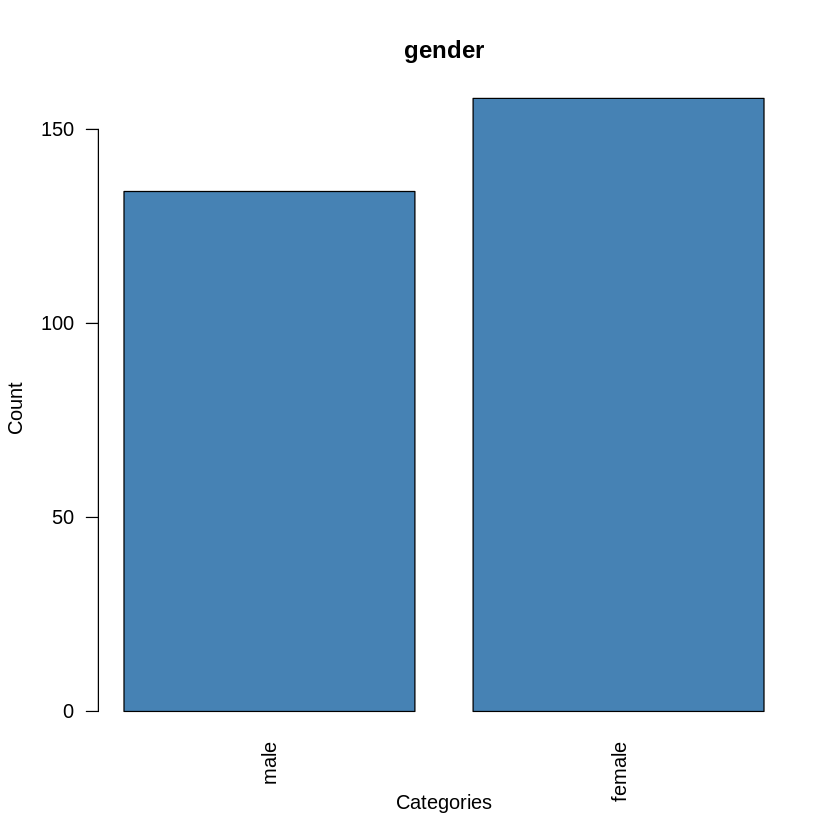

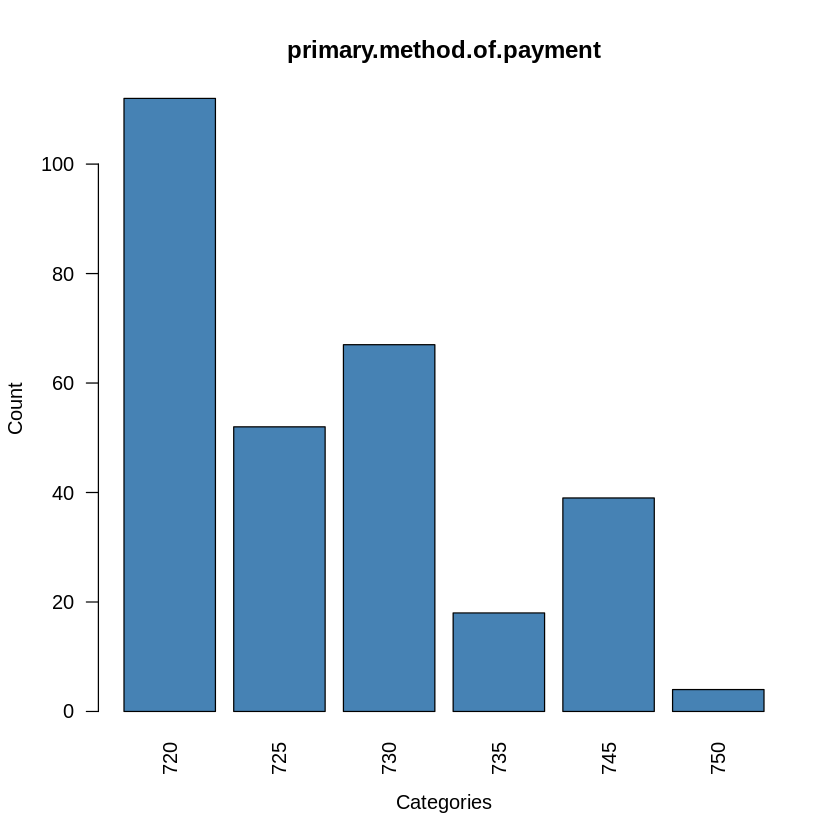

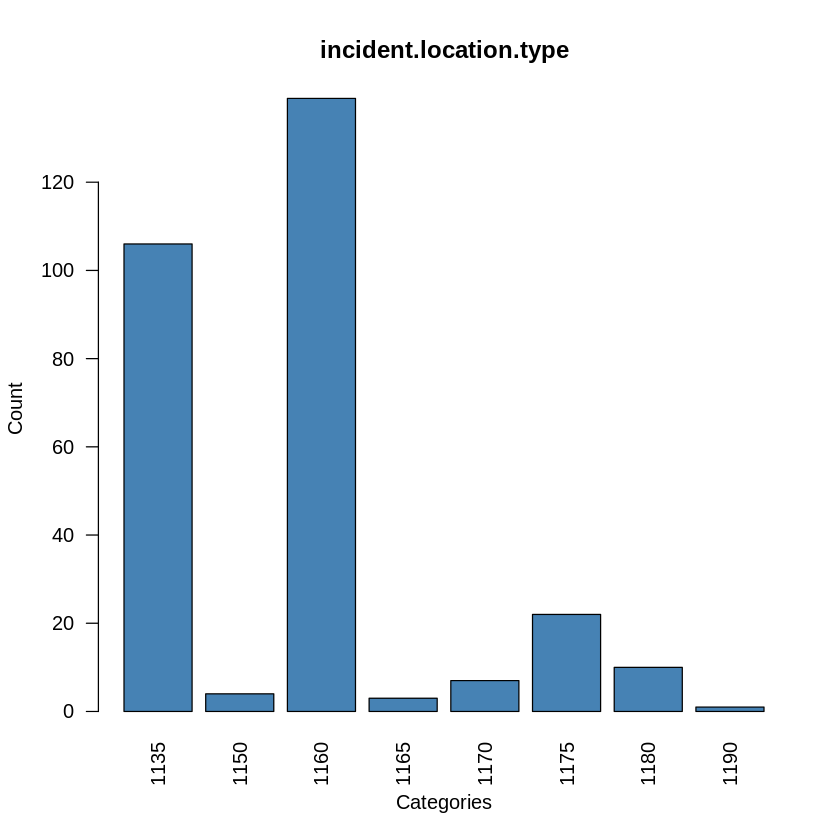

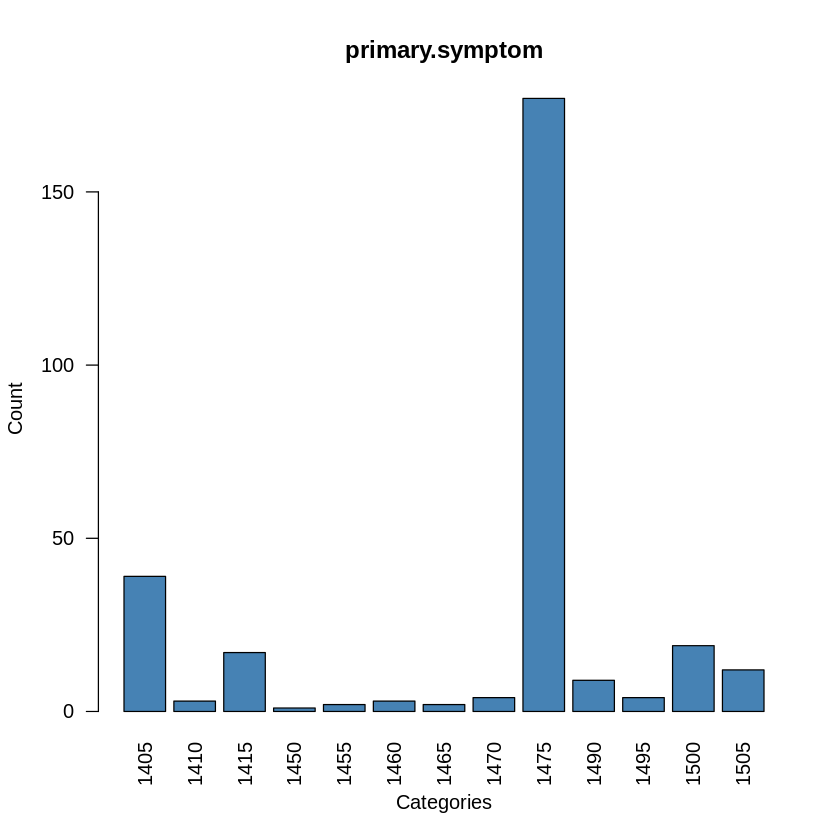

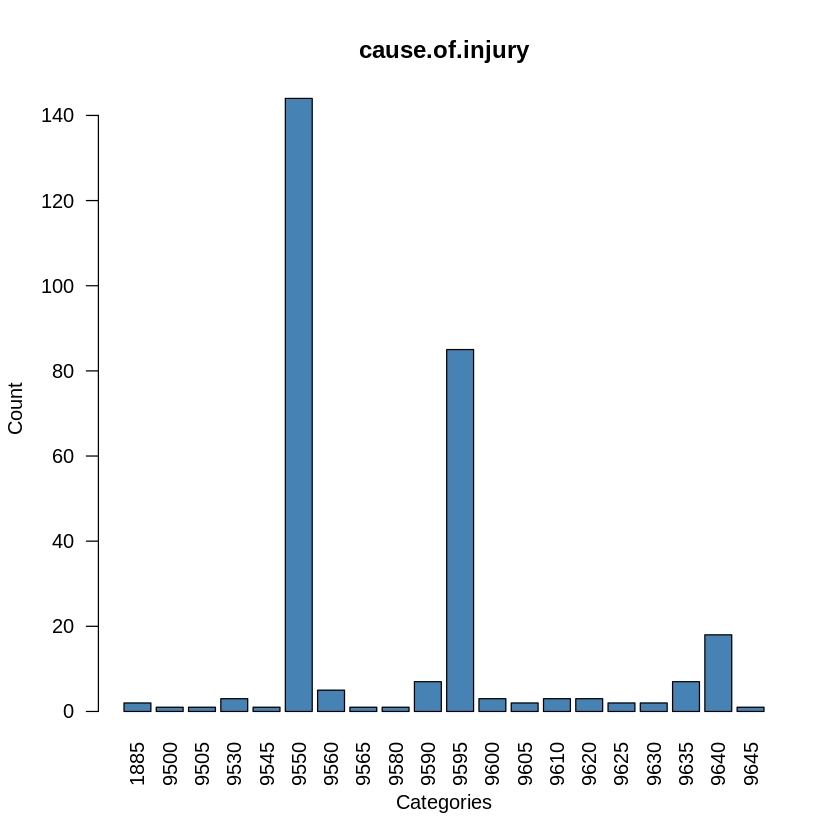

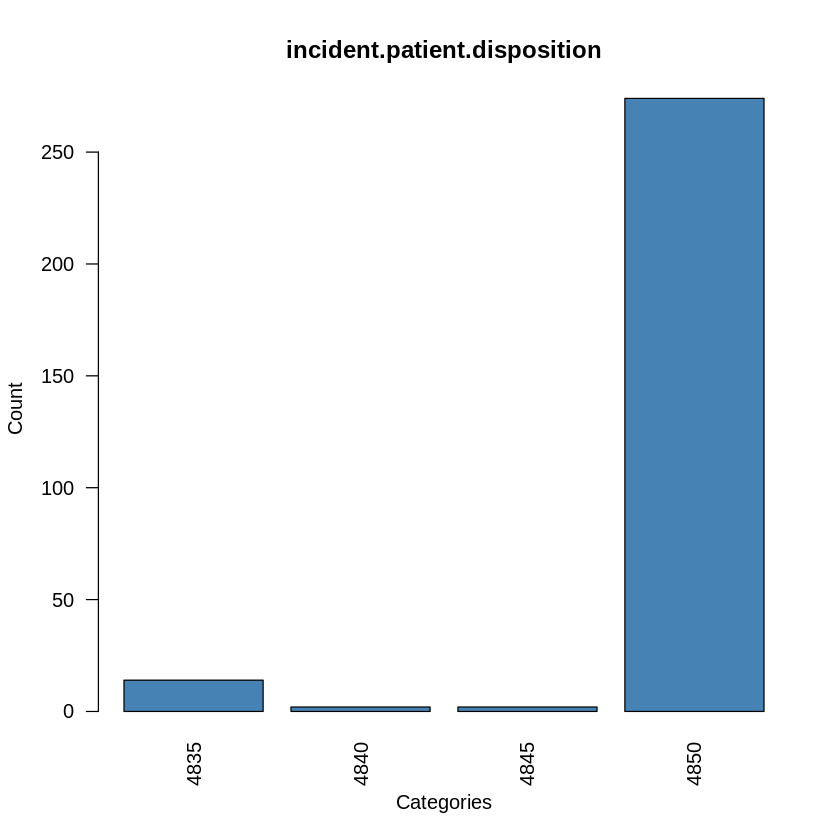

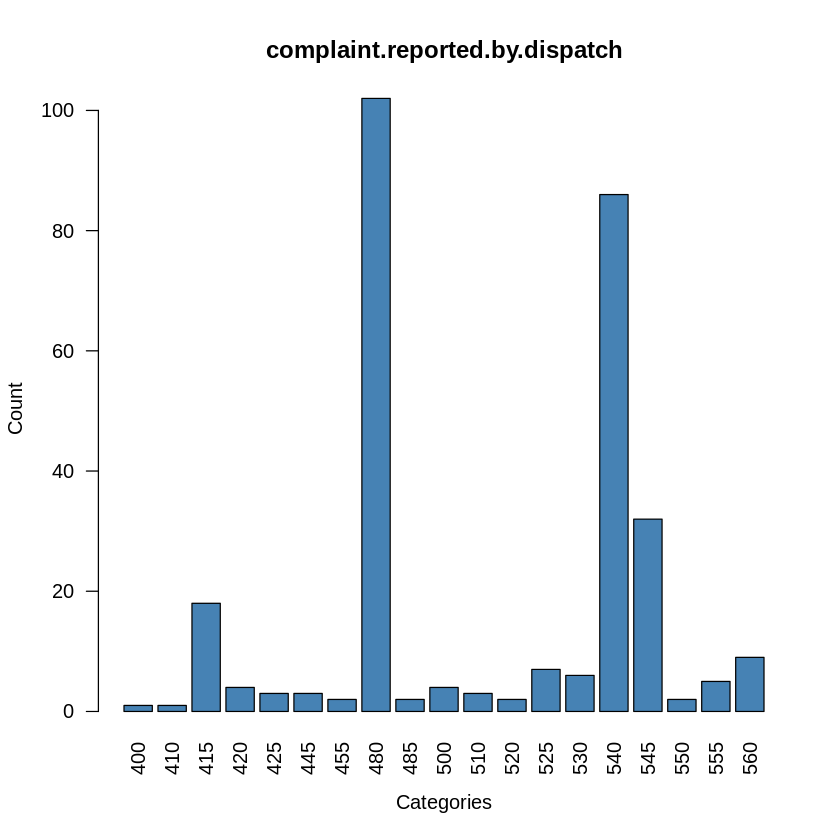

In [114]:
for (i in 2:8) {
  plot(event2[,i], main=colnames(event2)[i],
       ylab = "Count", xlab = "Categories", col="steelblue", las = 2)
  }

In [115]:
#PCA_data = select(clean_data, -log_paamv)
res.pca =PCAmix(X.quanti=event2[,c(1)], X.quali=event2[,c(2:8)], ndim=4, graph=FALSE) #The scale.unit = TRUE is doing the standarization.
summary(res.pca)

#age.in.years ~. -age.in.years, data= event2


Call:
PCAmix(X.quanti = event2[, c(1)], X.quali = event2[, c(2:8)],     ndim = 4, graph = FALSE)

Method = Factor Analysis of mixed data (FAmix)

Data: 
   number of observations:  292
   number of  variables:  8
        number of numerical variables:  1
        number of categorical variables:  7

Squared loadings :
                               dim 1 dim 2 dim 3 dim 4
X.quanti                        0.56  0.03  0.00  0.00
gender                          0.07  0.01  0.10  0.01
primary.method.of.payment       0.45  0.08  0.55  0.08
incident.location.type          0.42  0.28  0.25  0.05
primary.symptom                 0.14  0.42  0.18  0.64
cause.of.injury                 0.81  0.83  0.26  0.78
incident.patient.disposition    0.02  0.03  0.48  0.01
complaint.reported.by.dispatch  0.79  0.82  0.50  0.65




In [116]:
res.mca <- MCA(event2[,2:8], ncp = 4, graph = FALSE)
summary(res.mca)


Call:
MCA(X = event2[, 2:8], ncp = 4, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.407   0.351   0.331   0.318   0.305   0.293   0.285
% of var.              4.385   3.785   3.566   3.420   3.285   3.155   3.066
Cumulative % of var.   4.385   8.171  11.736  15.156  18.441  21.596  24.663
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.282   0.261   0.242   0.239   0.228   0.224   0.220
% of var.              3.039   2.815   2.611   2.576   2.452   2.411   2.374
Cumulative % of var.  27.702  30.517  33.128  35.705  38.156  40.567  42.941
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.218   0.210   0.196   0.193   0.186   0.177   0.170
% of var.              2.352   2.258   2.108   2.077   2.001   1.910   1.830
Cumulative % of var.  45.293  47.551  49.658  51.735  53.736  55.646  57.476
       

In [ ]:
fviz_screeplot(res.mca, addlabels = TRUE, ylim = c(0, 5))

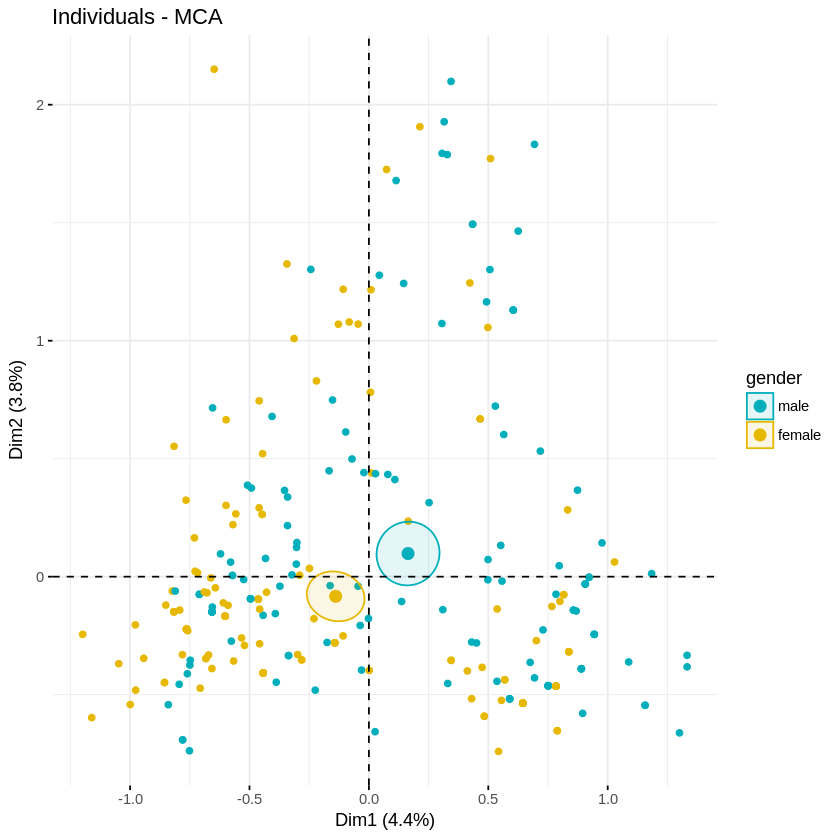

In [120]:
fviz_mca_ind(res.mca, 
             label = "none", # hide individual labels
             habillage = "gender", # color by groups 
             palette = c("#00AFBB", "#E7B800"),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_minimal()) 

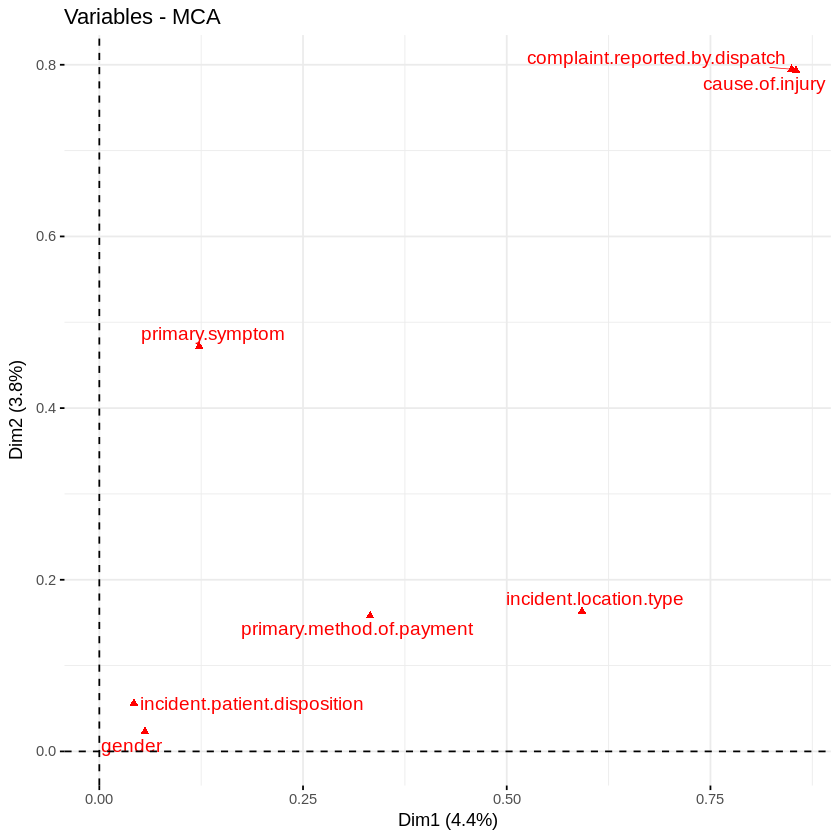

In [118]:
fviz_mca_var(res.mca, choice = "mca.cor", 
            repel = TRUE, # Avoid text overlapping (slow)
            ggtheme = theme_minimal())

#It can be seen that, the variables gender and incident.patient.disposition are the most correlated 
#with dimension 1. Similarly, the variable primary.symptom is the most correlated with dimension 2.

In [119]:
fviz_mca_var(res.mca, choice = "quanti.sup",
             ggtheme = theme_minimal())


ERROR: Error in class(vars) <- c("factoextra", "mca", element_class): attempt to set an attribute on NULL


In [ ]:
res.mfa <- MFA(wine, 
               group = c(2, 5, 3, 10, 9, 2), 
               type = c("n", "s", "s", "s", "s", "s"),
               name.group = c("origin","odor","visual",
                              "odor.after.shaking", "taste","overall"),
               num.group.sup = c(1, 6),
               graph = FALSE)

In [91]:
library("corrplot")
#pca plots
corrplot(res.pca$var$cos2, is.corr=FALSE)

ERROR: Error in corrplot(res.pca$var$cos2, is.corr = FALSE): Need a matrix or data frame!


In [ ]:
age.in.years,day.of.year, 
event2 = event1[event1$incident.patient.disposition == "4835",]
dim(event2)
#head(event2, n=20)


event3 = na.exclude(event2)
dim(event3)
#refuse = df1[,-47]

In [ ]:
dim(event2)